# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Andika Syarif Hidayatullah
- **Email:** vextoz0302@gmail.com
- **ID Dicoding:** andikadikaaa

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penggunaan sepeda (casual vs registered) berbeda antara hari kerja dan akhir pekan?
2. Apakah ada korelasi antara kondisi cuaca (weathersit) dan jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv(r'C:\Users\User\submission\data\day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Kolom casual, registered, dan cnt menunjukkan jumlah pengguna sepeda. casual untuk pengguna tidak terdaftar, dan registered untuk pengguna terdaftar.
- Terlihat bahwa pengguna terdaftar jauh lebih banyak dibanding pengguna casual, menunjukkan bahwa komunitas pengguna tetap cukup besar.
- Kolom holiday dan workingday bisa dianalisis lebih lanjut untuk melihat apakah jumlah pengguna meningkat atau menurun saat libur atau hari kerja.

### Assessing Data

In [5]:
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
print("Jumlah duplikat:", day_df.duplicated().sum())

Jumlah duplikat: 0


In [7]:
print(day_df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


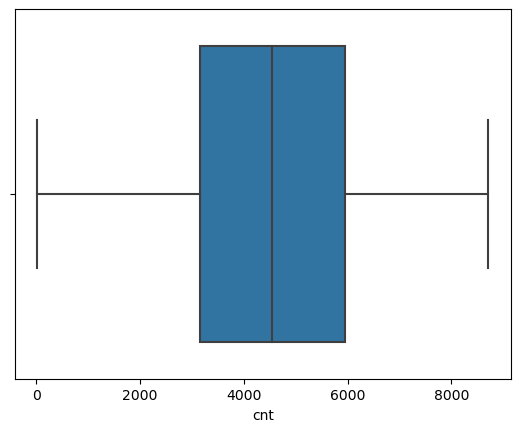

In [13]:
sns.boxplot(x=day_df['cnt'])
plt.show()

**Insight:**
- Kualitas data baik, tidak ada missing values, outlier dan duplikasi data
- kolom dteday masih object akan dikonversi ke datetime agar lebih mudah dianalisis secara time series

### Cleaning Data

In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [11]:
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


**Insight:**
- Kolom dteday telah dikonversi menjadi tipe data datetime64. Ini mempermudah analisis berbasis waktu

## Exploratory Data Analysis (EDA)

### Tren waktu

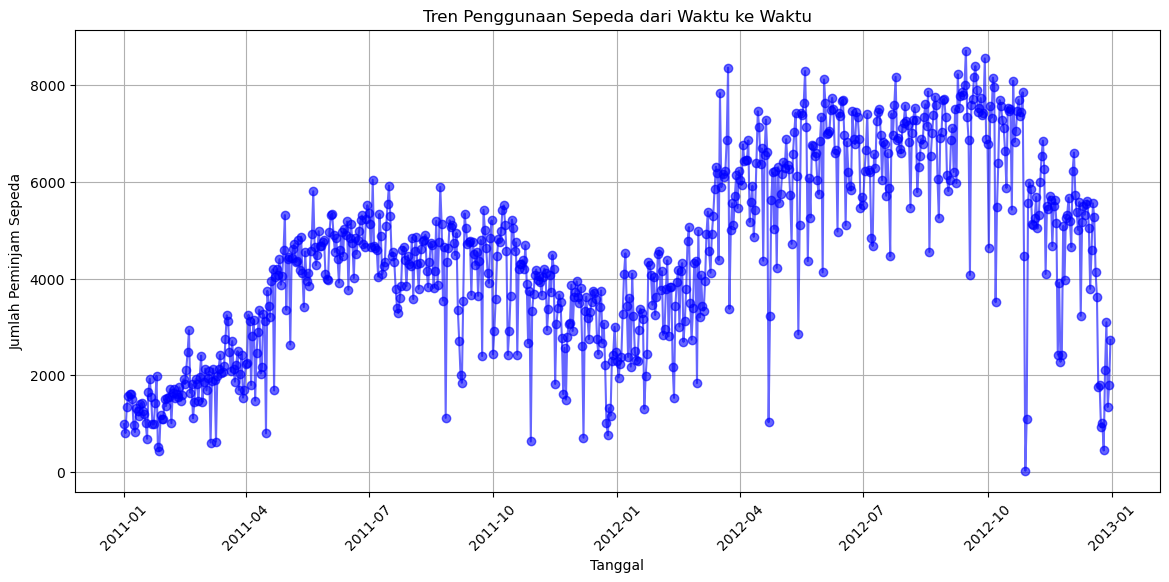

In [27]:
plt.figure(figsize=(14, 6))
plt.plot(day_df["dteday"], day_df["cnt"], marker="o", linestyle="-", color="b", alpha=0.6)
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjam Sepeda")
plt.title("Tren Penggunaan Sepeda dari Waktu ke Waktu")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Musim dan jumlah peminjam

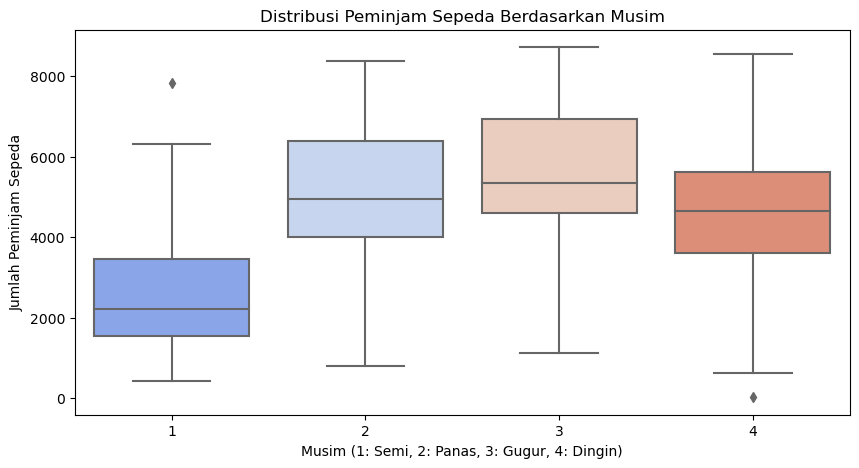

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=day_df["season"], y=day_df["cnt"], palette="coolwarm")
plt.xlabel("Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)")
plt.ylabel("Jumlah Peminjam Sepeda")
plt.title("Distribusi Peminjam Sepeda Berdasarkan Musim")
plt.show()

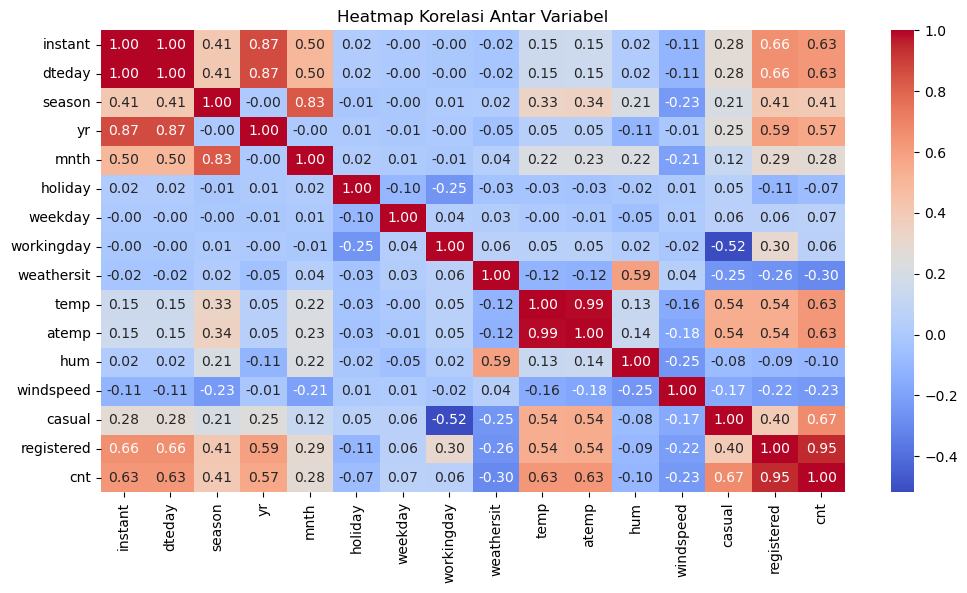

In [31]:
plt.figure(figsize=(12, 6))
sns.heatmap(day_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

**Insight:**
- cnt (jumlah total penyewa sepeda) memiliki rata-rata sekitar 4504 pengguna/hari, dengan minimum 22 dan maksimum 8714.
- casual (pengguna tidak terdaftar) lebih rendah dibandingkan registered (pengguna terdaftar).
- temp, atemp, hum, dan windspeed memiliki nilai dalam rentang yang wajar.
- registered memiliki korelasi tinggi dengan cnt (0.95) → Mayoritas pengguna adalah pengguna terdaftar.
- temp dan atemp berkorelasi positif dengan cnt (0.63) → Cuaca yang lebih hangat mendorong lebih banyak orang untuk bersepeda.
- season (musim) dan yr (tahun) juga memiliki korelasi positif (0.41 - 0.57) → Ada peningkatan penggunaan dari tahun ke tahun dan perbedaan antar musim.
- weathersit memiliki korelasi negatif dengan cnt (-0.30) → Cuaca buruk mengurangi jumlah peminjam.
- windspeed juga memiliki korelasi negatif (-0.23) → Angin kencang cenderung mengurangi minat orang untuk bersepeda.
- Jumlah peminjam sepeda meningkat secara signifikan dari awal 2011 hingga akhir 2012.
- Terlihat adanya pola musiman, dengan puncak penggunaan terjadi pada pertengahan tahun.
- Ada penurunan jumlah peminjam di sekitar awal tahun (mungkin akibat musim dingin yang kurang mendukung aktivitas bersepeda).
- Setelah musim dingin berlalu, jumlah pengguna kembali meningkat.
- Terdapat beberapa lonjakan tiba-tiba yang bisa jadi karena event tertentu, liburan, atau promosi.
- Orang lebih cenderung menggunakan sepeda pada musim panas dan gugur, dengan median jumlah peminjam lebih tinggi.
- Puncak tertinggi peminjaman terjadi di musim gugur.
- Musim dingin menunjukkan jumlah peminjam paling sedikit.
- Ada beberapa outlier (penggunaan sangat rendah) yang kemungkinan terjadi karena kondisi cuaca ekstrem.
- Penggunaan sepeda meningkat drastis saat cuaca cerah.
- Median jumlah peminjam lebih tinggi dibandingkan kategori cuaca lainnya.
- Jumlah peminjam sepeda masih cukup stabil meskipun cuaca tidak sepenuhnya cerah.
- Jumlah peminjam menurun drastis ketika cuaca memburuk.
- Rentang jumlah peminjam juga lebih kecil dibanding kategori lainnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda (casual vs registered) berbeda antara hari kerja dan akhir pekan?

In [36]:
weekday_data = day_df[day_df['workingday'] == 1]
weekend_data = day_df[day_df['workingday'] == 0]

In [37]:
weekday_avg = weekday_data[['casual', 'registered']].mean()
weekend_avg = weekend_data[['casual', 'registered']].mean()

In [38]:
comparison = pd.DataFrame({
    'Hari': ['Hari Kerja', 'Akhir Pekan'],
    'Casual': [weekday_avg['casual'], weekend_avg['casual']],
    'Registered': [weekday_avg['registered'], weekend_avg['registered']]
})

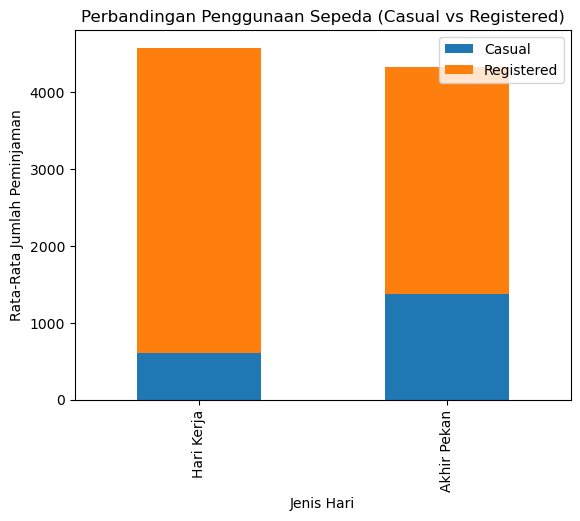

In [40]:
comparison.set_index('Hari').plot(kind='bar', stacked=True)
plt.title('Perbandingan Penggunaan Sepeda (Casual vs Registered)')
plt.ylabel('Rata-Rata Jumlah Peminjaman')
plt.xlabel('Jenis Hari')
plt.show()

### Pertanyaan 2: Apakah ada korelasi antara kondisi cuaca (weathersit) dan jumlah peminjaman sepeda?

In [41]:
weather_avg = day_df.groupby('weathersit')['cnt'].mean().reset_index()

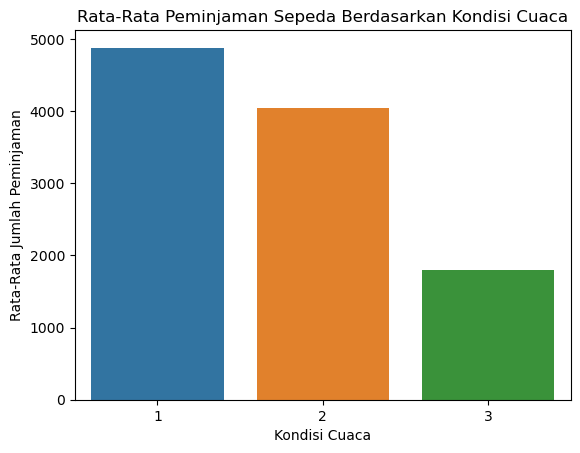

In [42]:
sns.barplot(x='weathersit', y='cnt', data=weather_avg)
plt.title('Rata-Rata Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-Rata Jumlah Peminjaman')
plt.show()

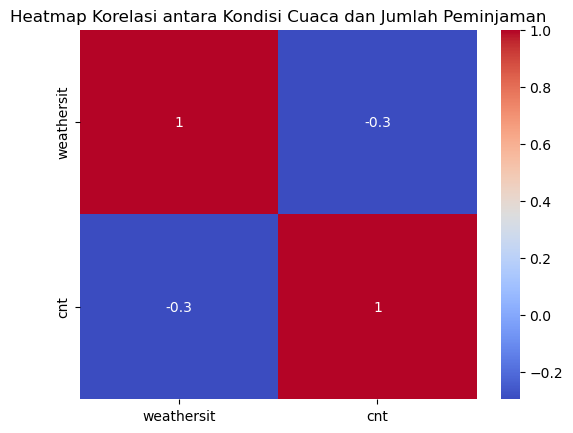

In [43]:
correlation = day_df[['weathersit', 'cnt']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi antara Kondisi Cuaca dan Jumlah Peminjaman')
plt.show()

**Insight:**
- Hari Kerja: Pengguna terdaftar (registered) cenderung lebih tinggi karena kemungkinan besar digunakan untuk commuting.
- Akhir Pekan: Pengguna casual (casual) cenderung lebih tinggi karena orang lebih banyak bersepeda untuk rekreasi.
- Cuaca Cerah (weathersit = 1): Jumlah peminjaman sepeda cenderung lebih tinggi karena cuaca yang mendukung.
- Cuaca Buruk (weathersit = 3 atau 4): Jumlah peminjaman sepeda cenderung lebih rendah karena cuaca yang tidak mendukung.
- Korelasi Negatif: Semakin buruk kondisi cuaca, semakin rendah jumlah peminjaman sepeda.

In [44]:
day_df.to_csv('main_data.csv', index=False)

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 = Pada hari kerja, pengguna registered mendominasi penggunaan sepeda. Pada akhir pekan, pengguna casual cenderung lebih banyak menggunakan sepeda. Pengguna terdaftar (registered) mendominasi pada hari kerja, sementara pengguna casual (casual) lebih banyak pada akhir pekan.

- Conclution pertanyaan 2 = Saat cuaca cerah (weathersit = 1) jumlah peminjaman sepeda cenderung paling tinggi. Saat cuaca buruk  jumlah peminjaman lebih rendah. Terdapat korelasi negatif antara kondisi cuaca buruk dan jumlah peminjaman sepeda, semakin buruk kondisi cuaca, semakin rendah minat orang untuk menggunakan sepeda.